In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
import models.segmentation_models_qubvel as sm
from utils.augmentation import get_preprocessing
from utils.smooth_tiled_predictions import predict_img_with_smooth_windowing
from predict_image import predict

Segmentation Models: using `keras` framework.


# Qualitative Evaluation
To recreate our qualitative evaluation results, you can run the following code sections.
Make sure to change 'save_path' in the calls of the predict function to where you want to store prediction results, and to change the path to the folder where the images to be predicted are located (in the next chunk). With this notebook, we also generated the predictions used in the thesis to test the patch stitching function.

- flight9_dir = 'unet_melt_pond_detection/qualitative_data/flight9'
- flight16_dir = 'unet_melt_pond_detection/qualitative_data/flight16'

In [3]:
# prediction images (cropped and grayscale)
flight9_dir = 'E:/polar/code/data/evaluation/qualitative/flight9/'
flight16_dir = 'E:/polar/code/data/evaluation/qualitative/flight16/'

flight9_dir_norm = 'E:/polar/code/data/evaluation/qualitative/flight9_norm/'
flight16_dir_norm = 'E:/polar/code/data/evaluation/qualitative/flight16_norm/'

weights = 'model_weights/best_modelfinal_runsharpen500.h5'
weights_32 = 'model_weights/best_modelpatch_size_32_foldn3.h5'

weights_extended = 'weights/best_modelextended.h5'
weights_extended_norm = 'weights/best_modelextended_norm.h5'

weights_extended_16 = 'weights/best_modeltest02.h5'

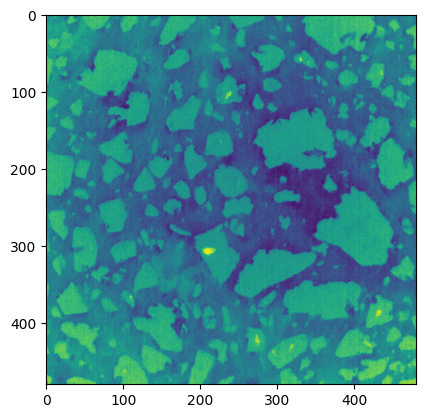

In [18]:
img = cv2.imread(os.path.join(flight9_dir, '0.png'), 0)
#img = 1 - img

plt.imshow(img)

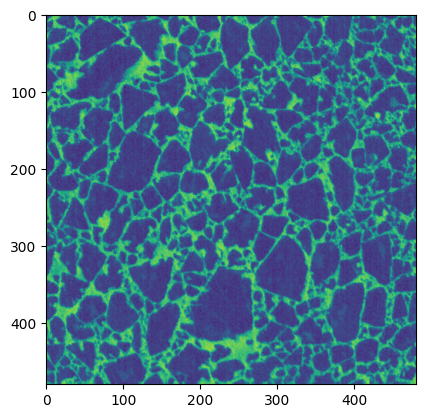

In [13]:
img = cv2.imread(os.path.join(flight9_dir, '3.png'), 0)
img = 1 - img

plt.imshow(img)

1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0


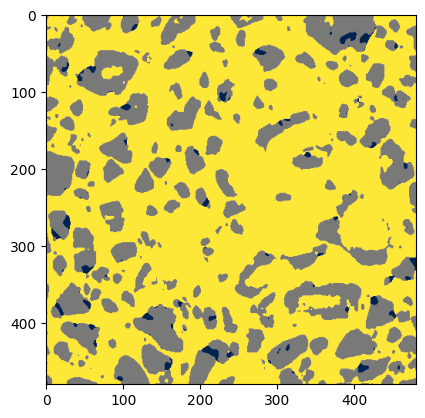

In [9]:

predict(img, 480, weights_extended, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/ponds_extended_data/evaluation/qualitative/test01/pred_9/0.png')

1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0


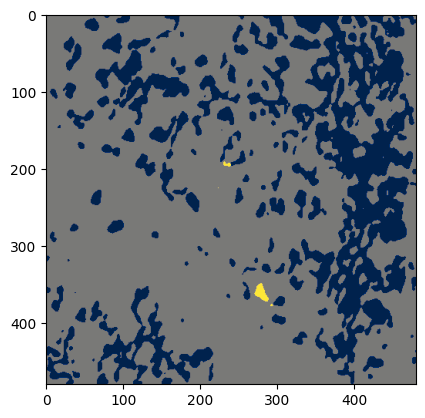

In [6]:
### final model predictions, flight 9

for idx, file in enumerate(os.listdir(flight9_dir)):
    img = cv2.imread(os.path.join(flight9_dir, file), 0)
    predict(img, 480, weights_extended_16, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/ponds_extended_data/evaluation/qualitative/test02/pred_9/{}.png'.format(idx))

1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0


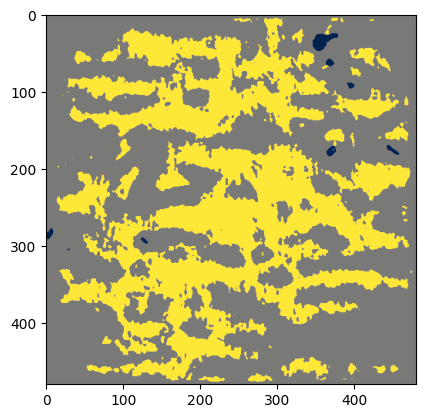

In [8]:
### final model predictions, flight 16

for idx, file in enumerate(os.listdir(flight16_dir)):
    img = cv2.imread(os.path.join(flight16_dir_norm, file), 0)
    predict(img, 480, weights_extended, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/ponds_extended_data/evaluation/qualitative/test01/pred_16/{}.png'.format(idx))

In [9]:
### smooth predictions, patch size 32 x 32, flight 9

for idx, file in enumerate(os.listdir(flight9_dir)):
    img = cv2.imread(os.path.join(flight9_dir, file), 0)
    predict(img, 32, weights_32, smooth=True, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/data/evaluation/qualitative/32_smooth/pred_9/{}.png'.format(idx))

(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 28s 213ms/step


 12%|█▎        | 1/8 [00:44<05:10, 44.31s/it]

125/125 [==============================] - 22s 175ms/step


 25%|██▌       | 2/8 [01:07<03:11, 31.94s/it]

125/125 [==============================] - 22s 178ms/step


 25%|██▌       | 2/8 [01:49<05:27, 54.62s/it]


KeyboardInterrupt: 

(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 22s 162ms/step


 12%|█▎        | 1/8 [00:23<02:44, 23.49s/it]

125/125 [==============================] - 20s 164ms/step


 25%|██▌       | 2/8 [00:45<02:15, 22.60s/it]

125/125 [==============================] - 21s 166ms/step


 38%|███▊      | 3/8 [01:07<01:52, 22.49s/it]

125/125 [==============================] - 21s 170ms/step


 50%|█████     | 4/8 [01:30<01:30, 22.67s/it]

125/125 [==============================] - 21s 168ms/step


 62%|██████▎   | 5/8 [01:53<01:07, 22.64s/it]

125/125 [==============================] - 21s 168ms/step


 75%|███████▌  | 6/8 [02:15<00:45, 22.60s/it]

125/125 [==============================] - 22s 173ms/step


 88%|████████▊ | 7/8 [02:39<00:22, 22.83s/it]

125/125 [==============================] - 21s 167ms/step


100%|██████████| 8/8 [03:01<00:00, 22.71s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 22s 168ms/step


 12%|█▎        | 1/8 [00:24<02:48, 24.13s/it]

125/125 [==============================] - 22s 175ms/step


 25%|██▌       | 2/8 [00:47<02:22, 23.73s/it]

125/125 [==============================] - 21s 167ms/step


 38%|███▊      | 3/8 [01:30<02:41, 32.31s/it]

125/125 [==============================] - 21s 170ms/step


 50%|█████     | 4/8 [01:52<01:54, 28.58s/it]

125/125 [==============================] - 21s 169ms/step


 62%|██████▎   | 5/8 [02:15<01:19, 26.51s/it]

125/125 [==============================] - 21s 168ms/step


 75%|███████▌  | 6/8 [02:38<00:50, 25.18s/it]

125/125 [==============================] - 22s 173ms/step


 88%|████████▊ | 7/8 [03:01<00:24, 24.52s/it]

125/125 [==============================] - 21s 171ms/step


100%|██████████| 8/8 [03:24<00:00, 25.58s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 21s 162ms/step


 12%|█▎        | 1/8 [00:23<02:41, 23.11s/it]

125/125 [==============================] - 20s 157ms/step


 25%|██▌       | 2/8 [00:44<02:11, 21.97s/it]

125/125 [==============================] - 20s 156ms/step


 38%|███▊      | 3/8 [01:05<01:47, 21.59s/it]

125/125 [==============================] - 20s 158ms/step


 50%|█████     | 4/8 [01:26<01:26, 21.57s/it]

125/125 [==============================] - 21s 164ms/step


 62%|██████▎   | 5/8 [01:49<01:05, 21.92s/it]

125/125 [==============================] - 21s 166ms/step


 75%|███████▌  | 6/8 [02:11<00:44, 22.10s/it]

125/125 [==============================] - 19s 154ms/step


 88%|████████▊ | 7/8 [02:32<00:21, 21.67s/it]

125/125 [==============================] - 19s 155ms/step


100%|██████████| 8/8 [02:53<00:00, 21.70s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 21s 158ms/step


 12%|█▎        | 1/8 [00:22<02:38, 22.62s/it]

125/125 [==============================] - 19s 155ms/step


 25%|██▌       | 2/8 [00:43<02:09, 21.64s/it]

125/125 [==============================] - 19s 156ms/step


 38%|███▊      | 3/8 [01:04<01:46, 21.31s/it]

125/125 [==============================] - 21s 165ms/step


 50%|█████     | 4/8 [01:26<01:26, 21.69s/it]

125/125 [==============================] - 20s 159ms/step


 62%|██████▎   | 5/8 [01:48<01:05, 21.69s/it]

125/125 [==============================] - 20s 161ms/step


 75%|███████▌  | 6/8 [02:10<00:43, 21.67s/it]

125/125 [==============================] - 19s 155ms/step


 88%|████████▊ | 7/8 [02:30<00:21, 21.39s/it]

125/125 [==============================] - 19s 155ms/step


100%|██████████| 8/8 [02:51<00:00, 21.48s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 21s 160ms/step


 12%|█▎        | 1/8 [00:22<02:40, 22.93s/it]

125/125 [==============================] - 22s 175ms/step


 25%|██▌       | 2/8 [00:46<02:19, 23.28s/it]

125/125 [==============================] - 21s 169ms/step


 38%|███▊      | 3/8 [01:28<02:40, 32.03s/it]

125/125 [==============================] - 21s 171ms/step


 50%|█████     | 4/8 [01:51<01:53, 28.38s/it]

125/125 [==============================] - 21s 165ms/step


 62%|██████▎   | 5/8 [02:34<01:40, 33.44s/it]

125/125 [==============================] - 21s 166ms/step


 75%|███████▌  | 6/8 [02:56<00:59, 29.65s/it]

125/125 [==============================] - 26s 205ms/step


 88%|████████▊ | 7/8 [03:23<00:28, 28.84s/it]

125/125 [==============================] - 23s 186ms/step


100%|██████████| 8/8 [04:06<00:00, 30.79s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 22s 166ms/step


 12%|█▎        | 1/8 [00:23<02:45, 23.59s/it]

125/125 [==============================] - 20s 164ms/step


 25%|██▌       | 2/8 [00:45<02:16, 22.71s/it]

125/125 [==============================] - 22s 174ms/step


 38%|███▊      | 3/8 [01:09<01:54, 22.99s/it]

125/125 [==============================] - 22s 172ms/step


 50%|█████     | 4/8 [01:32<01:32, 23.10s/it]

125/125 [==============================] - 22s 175ms/step


 62%|██████▎   | 5/8 [01:55<01:09, 23.26s/it]

125/125 [==============================] - 21s 172ms/step


 75%|███████▌  | 6/8 [02:18<00:46, 23.20s/it]

125/125 [==============================] - 21s 171ms/step


 88%|████████▊ | 7/8 [02:42<00:23, 23.18s/it]

125/125 [==============================] - 21s 165ms/step


100%|██████████| 8/8 [03:04<00:00, 23.05s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 21s 160ms/step


 12%|█▎        | 1/8 [00:22<02:40, 22.89s/it]

125/125 [==============================] - 20s 158ms/step


 25%|██▌       | 2/8 [00:44<02:11, 21.95s/it]

125/125 [==============================] - 20s 157ms/step


 38%|███▊      | 3/8 [01:05<01:47, 21.57s/it]

125/125 [==============================] - 20s 158ms/step


 50%|█████     | 4/8 [01:26<01:25, 21.45s/it]

125/125 [==============================] - 20s 156ms/step


 62%|██████▎   | 5/8 [01:47<01:03, 21.33s/it]

125/125 [==============================] - 21s 167ms/step


 75%|███████▌  | 6/8 [02:10<00:43, 21.71s/it]

125/125 [==============================] - 21s 169ms/step


 88%|████████▊ | 7/8 [02:32<00:22, 22.07s/it]

125/125 [==============================] - 22s 174ms/step


100%|██████████| 8/8 [02:56<00:00, 22.05s/it]


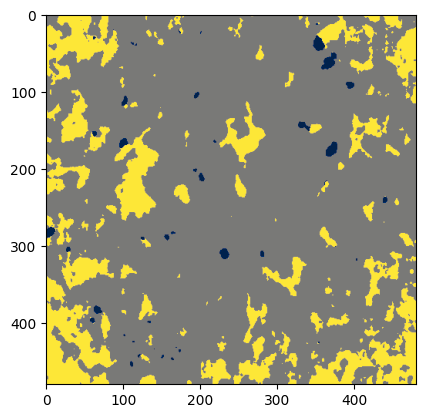

In [10]:
### smooth predictions, 32 x 32 patch size, flight 16

for idx, file in enumerate(os.listdir(flight16_dir)):
    img = cv2.imread(os.path.join(flight16_dir, file), 0)
    predict(img, 32, weights_32, smooth=True, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/data/evaluation/qualitative/32_smooth/pred_16/{}.png'.format(idx))

1/1 [==============================] - 1s 1s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 0s 79ms/step
Finished processing patch number  2  at position  0 32
1/1 [==============================] - 0s 98ms/step
Finished processing patch number  3  at position  0 64
1/1 [==============================] - 0s 63ms/step
Finished processing patch number  4  at position  0 96
1/1 [==============================] - 0s 93ms/step
Finished processing patch number  5  at position  0 128
1/1 [==============================] - 0s 75ms/step
Finished processing patch number  6  at position  0 160
1/1 [==============================] - 0s 64ms/step
Finished processing patch number  7  at position  0 192
1/1 [==============================] - 0s 71ms/step
Finished processing patch number  8  at position  0 224
1/1 [==============================] - 0s 67ms/step
Finished processing patch number  9  at position  0 256
1/1 [==============================

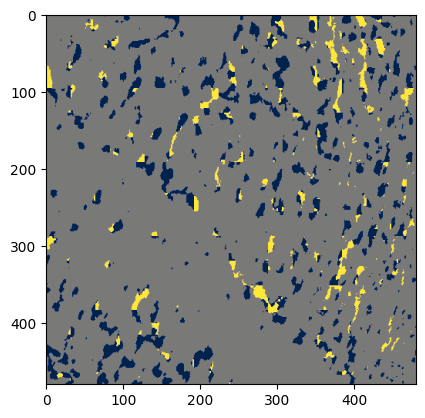

In [11]:
### prediction with border effects, 32 x 32 patch size, flight 9

for idx, file in enumerate(os.listdir(flight9_dir)):
    img = cv2.imread(os.path.join(flight9_dir, file), 0)
    predict(img, 32, weights_32, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/data/evaluation/qualitative/32_unsmooth/pred_9/{}.png'.format(idx))

1/1 [==============================] - 1s 1s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 0s 56ms/step
Finished processing patch number  2  at position  0 32
1/1 [==============================] - 0s 126ms/step
Finished processing patch number  3  at position  0 64
1/1 [==============================] - 0s 66ms/step
Finished processing patch number  4  at position  0 96
1/1 [==============================] - 0s 62ms/step
Finished processing patch number  5  at position  0 128
1/1 [==============================] - 0s 71ms/step
Finished processing patch number  6  at position  0 160
1/1 [==============================] - 0s 60ms/step
Finished processing patch number  7  at position  0 192
1/1 [==============================] - 0s 65ms/step
Finished processing patch number  8  at position  0 224
1/1 [==============================] - 0s 63ms/step
Finished processing patch number  9  at position  0 256
1/1 [=============================

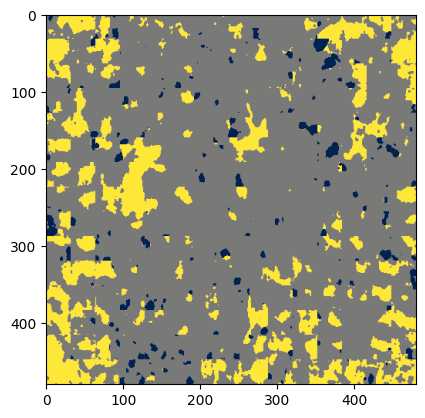

In [12]:
### prediction with border effects, 32 x 32 patch size, flight 16

for idx, file in enumerate(os.listdir(flight16_dir)):
    img = cv2.imread(os.path.join(flight16_dir, file), 0)
    predict(img, 32, weights_32, backbone='resnet34', train_transfer='imagenet', save_path='E:/polar/code/data/evaluation/qualitative/32_unsmooth/pred_16/{}.png'.format(idx))